<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QuantumGates_BarrierGate_Qiskit_AerSimulator_mkbahk_20241015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
%pip install qiskit[visualization]=='1.2.4'
#%pip install qiskit_ibm_runtime=='0.30.0'
%pip install qiskit_aer=='0.15.1'
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-tb3tgbaa
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-tb3tgbaa
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [40]:
%pip show qiskit qiskit_aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [41]:
from qiskit_aer import AerSimulator
backend = AerSimulator(method="statevector") # 'automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop'
print(backend)

AerSimulator('aer_simulator_statevector')


In [42]:
print(backend.configuration().basis_gates)

['ccx', 'ccz', 'cp', 'crx', 'cry', 'crz', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'diagonal', 'ecr', 'h', 'id', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcx_gray', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'store', 'swap', 'sx', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'break_loop', 'continue_loop', 'delay', 'for_loop', 'if_else', 'initialize', 'kraus', 'qerror_loc', 'quantum_channel', 'reset', 'roerror', 'save_amplitudes', 'save_amplitudes_sq', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_probabilities', 'save_probabilities_dict', 'save_state', 'save_statevector', 'save_statevector_dict', 'set_statevector', 'switch_case', 'while_loop']



# Barrier Gate
1. Barrier Gate는 양자 회로에서 **논리적 경계(logical barrier)**를 생성하는 역할
2. 특정 지점에서 큐비트 사이의 연산 순서를 고정하고, 회로 최적화 또는 재배치를 제한하는 데 사용
3. Barrier Gate 자체는 물리적인 연산을 수행하지 않으며, 큐비트의 상태에 직접적인 영향을 주지 않음



In [63]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

BarrierCircuit = QuantumCircuit(1, 1)
BarrierCircuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'q'), 0),), clbits=())

In [64]:
from qiskit.quantum_info import Operator
unitary = Operator(BarrierCircuit)
print(unitary)

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [65]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(unitary)

<IPython.core.display.Latex object>

In [52]:
# 2큐비트 양자 회로 생성
qc = QuantumCircuit(2)

# 첫 번째 연산
qc.h(0)  # 첫 번째 큐비트에 Hadamard 게이트 적용
qc.cx(0, 1)  # CNOT 게이트 적용

# Barrier 추가
qc.barrier()

# 두 번째 연산
qc.x(0)  # 첫 번째 큐비트에 X 게이트 적용
qc.z(1)  # 두 번째 큐비트에 Z 게이트 적용

# 회로 측정
qc.measure_all()

In [66]:
qc.draw()

┌───┐      ░ ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ X ├─░─┤M├───
        └───┘┌─┴─┐ ░ ├───┤ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░─┤ Z ├─░──╫─┤M├
             └───┘ ░ └───┘ ░  ║ └╥┘
meas: 2/══════════════════════╩══╩═
                              0  1

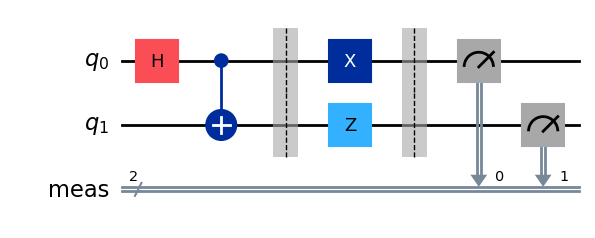

In [53]:
qc.draw(output='mpl')

In [54]:
job = backend.run(qc, shots=1024)
result = job.result()

In [55]:
result

Result(backend_name='aer_simulator_statevector', backend_version='0.15.1', qobj_id='', job_id='fc25aceb-b177-4bc0-b3bd-912d6b335c50', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 528, '0x1': 496}), header=QobjExperimentHeader(creg_sizes=[['meas', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-181', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=2900281164, metadata={'time_taken': 0.001709378, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.00030503, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, '

In [56]:
result.results

[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 528, '0x1': 496}), header=QobjExperimentHeader(creg_sizes=[['meas', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-181', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=2900281164, metadata={'time_taken': 0.001709378, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.00030503, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled': True}}, time_taken=0.001709378)]

In [57]:
result.results[0].data.counts

{'0x2': 528, '0x1': 496}

In [58]:
result.get_counts()

{'10': 528, '01': 496}

In [59]:
counts = result.get_counts()
print(counts)

{'10': 528, '01': 496}


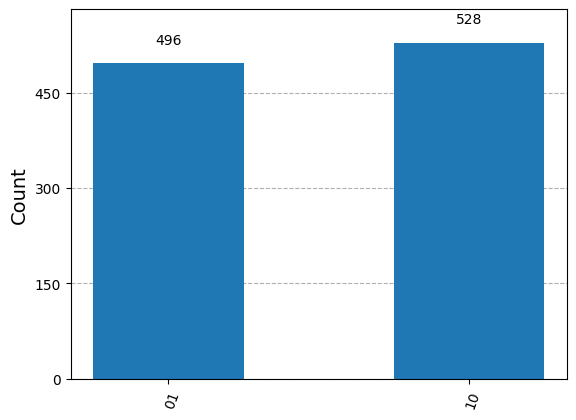

In [60]:
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector,plot_state_paulivec, plot_state_hinton, plot_state_qsphere
plot_histogram(counts)